# Digit Recognizer

Learn computer vision fundamentals with the famous MNIST data

##### Before we start, I minimized the training sets into 300+ rows, so that my local computer can access, but during the kaggle's competition the program achieve 0.997 with the real training sets.

##### competition link : https://www.kaggle.com/c/digit-recognizer

### Start here if...

You have some experience with R or Python and machine learning basics, but you’re new to computer vision. This competition is the perfect introduction to techniques like neural networks using a classic dataset including pre-extracted features.

### Competition Description

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

### Practice Skills

Computer vision fundamentals including simple neural networks
Classification methods such as SVM and K-nearest neighbors
Acknowledgements 

More details about the dataset, including algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html. The dataset is made available under a Creative Commons Attribution-Share Alike 3.0 license.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load Kaggle's training images

In [9]:
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# prepare data for training (Neural Network)
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)
X_train = X_train / 255.0
X_test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

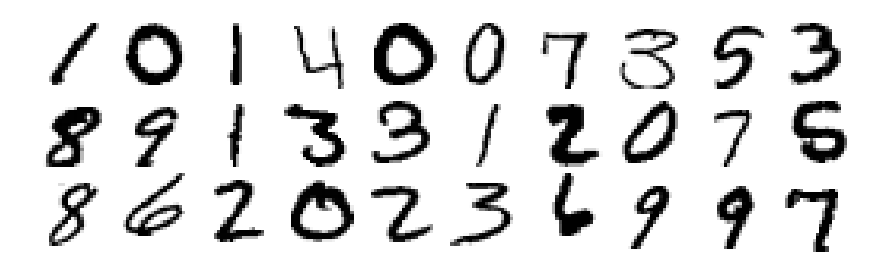

In [10]:
import matplotlib.pyplot as plt
# view images
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

### Generate more samples by randomly rotating, scaling, and shifting training datasets.


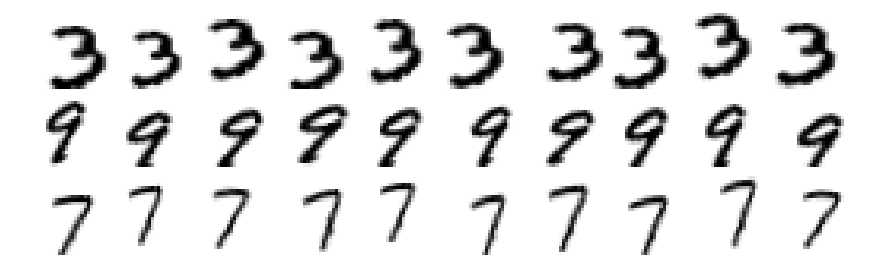

In [5]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=11,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

# PREVIEW AUGMENTED IMAGES
X_train3 = X_train[9,].reshape((1,28,28,1))
Y_train3 = Y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    X_train2, Y_train2 = datagen.flow(X_train3,Y_train3).next()
    plt.imshow(X_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = X_train[11,].reshape((1,28,28,1))
    if i==19: X_train3 = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [6]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 15
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.25))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.25))

    model[j].add(Flatten())
    model[j].add(Dense(512, activation='relu'))
    model[j].add(Dropout(0.25))
    model[j].add(Dense(512, activation='relu'))
    model[j].add(Dropout(0.25))
    model[j].add(Dense(10, activation='softmax'))

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0] * nets
epochs = 50
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.2)
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN 1: Epochs=50, Train accuracy=0.94239, Validation accuracy=0.93443
CNN 2: Epochs=50, Train accuracy=0.95885, Validation accuracy=0.91803
CNN 3: Epochs=50, Train accuracy=0.93416, Validation accuracy=0.96721
CNN 4: Epochs=50, Train accuracy=0.93827, Validation accuracy=0.95082
CNN 5: Epochs=50, Train accuracy=0.93004, Validation accuracy=0.98361
CNN 6: Epochs=50, Train accuracy=0.94650, Validation accuracy=0.90164
CNN 7: Epochs=50, Train accuracy=0.95885, Validation accuracy=0.88525
CNN 8: Epochs=50, Train accuracy=0.93004, Validation accuracy=0.91803
CNN 9: Epochs=50, Train accuracy=0.94650, Validation accuracy=0.95082
CNN 10: Epochs=50, Train accuracy=0.95062, Validation accuracy=0.88525
CNN 11: Epochs=50, Train accuracy=0.94239, Validation accuracy=0.88525
CNN 12: Epochs=50, Train accuracy=0.93827, Validation accuracy=0.86885
CNN 13: Epochs=50, Train accuracy=0.93827, Validation accuracy=0.90164
CNN 14: Epochs=50, Train accuracy=0.94239, Validation accuracy=0.93443
CNN 15: Epochs=

after the neural network is trained, run prediction

In [11]:
# ENSEMBLE PREDICTIONS
results = np.zeros( (X_test.shape[0],10) ) 
for j in range(nets):
    results = results + model[j].predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

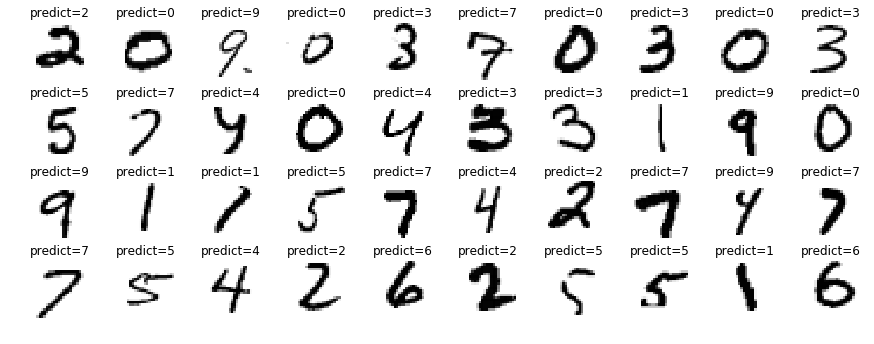

In [12]:
# show prediction
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predict=%d" % results[i],y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()